# Logistic Regression

In [1]:
# %load ../ ../starndard_import.txt

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf'}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimiter):
    data = np.loadtxt(file, delimiter=delimiter)
    print("Dimensions: ", data.shape)
    print(data[1:6,:])
    return data

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # if no specific axes object has been passed, get the current axes
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);
    

## Logistic regression

In [4]:
data = loaddata('data/ex2data1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [5]:
X = np.c_[np.ones((data.shape[0], 1)), data[:,0:2]]
y = np.c_[data[:,2]]

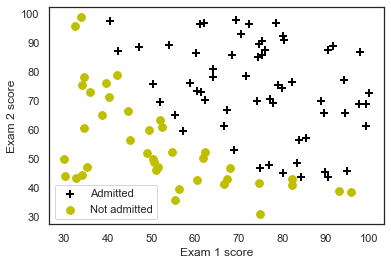

In [6]:
plotData(data, "Exam 1 score", 'Exam 2 score', 'Admitted', "Not admitted")

## Logistic regression hypothesis

## ℎ𝜃(𝑥)=𝑔(𝜃𝑇𝑥)
¶
## 𝑔(𝑧)=1/1+𝑒^−𝑧

In [7]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

### Scipy has actually a convenience function which does exactly the same

## Cost Function

In [8]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [9]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad = (1/m)*X.T.dot(h-y)
    # flatten() converts multi-dimensional arrays into one
    # dimensional flatten array or say single dimensional array
    return(grad.flatten())

In [10]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


## Optimize Cost function

In [13]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter': 400})
res

C:\Users\ojare\AppData\Local\Temp\ipykernel_11096\3515784987.py:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
C:\Users\ojare\AppData\Local\Temp\ipykernel_11096\3515784987.py:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))


      fun: 0.20349770158950992
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557621e-09,  4.36433486e-07, -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 25
     njev: 29
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

## Predict

In [14]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [15]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above(res.x)
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.7762903249331021

In [17]:
p = predict(res.x, X)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


## Decision Bundary

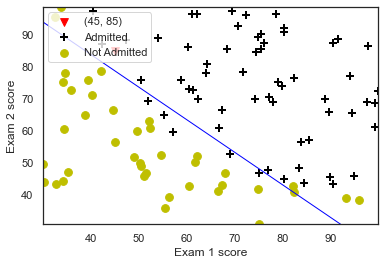

In [19]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');